# Neurons & Layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

## Neuron without activation - Regression/Linear Model

### DataSet


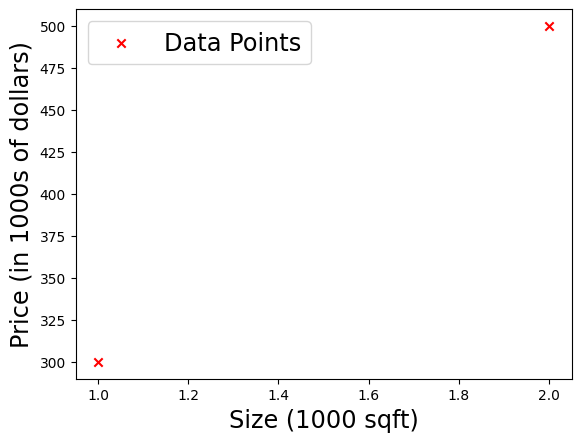

In [3]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

### Regression/Linear Model 

In [6]:
linear_layer = tf.keras.layers.Dense(units = 1, activation = 'linear')

In [9]:
linear_layer.get_weights()

[array([[-0.37196994]], dtype=float32), array([0.], dtype=float32)]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in X_train. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [10]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-0.37196994]], shape=(1, 1), dtype=float32)


In [11]:
w, b = linear_layer.get_weights()
print(f"w = {w}  b = {b}")

w = [[-0.37196994]]  b = [0.]


The weights are initialized to random values so let's set them to some known values.

In [12]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [13]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b
print(prediction_tf)
print(prediction_np)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[300.]
 [500.]]


As you can see, both produce the same prediction!

We can see this graphically with the help of the below code


In [14]:
import matplotlib.pyplot as plt

def plt_linear(X, Y, prediction_tf, prediction_np):
    plt.figure(figsize=(12, 4))

    # TensorFlow plot
    plt.subplot(1, 2, 1)
    plt.plot(X, prediction_tf, c='b', label='model output')  # predicted line
    plt.scatter(X, Y, c='r', marker='*', label='Data Points')  # actual data
    plt.xlabel("Size (1000 sqft)")
    plt.ylabel("Price (in 1000s of dollars)")
    plt.title("Tensorflow prediction")
    plt.legend()
    plt.text(1.3, 350, 'y=200x + 100', fontsize=12, color='magenta')  # equation

    # NumPy plot
    plt.subplot(1, 2, 2)
    plt.plot(X, prediction_np, c='b', label='model output')
    plt.scatter(X, Y, c='r', marker='*', label='Data Points')
    plt.xlabel("Size (1000 sqft)")
    plt.ylabel("Price (in 1000s of dollars)")
    plt.title("Numpy prediction")
    plt.legend()
    plt.text(1.3, 350, 'y=200x + 100', fontsize=12, color='magenta')

    plt.tight_layout()
    plt.show()

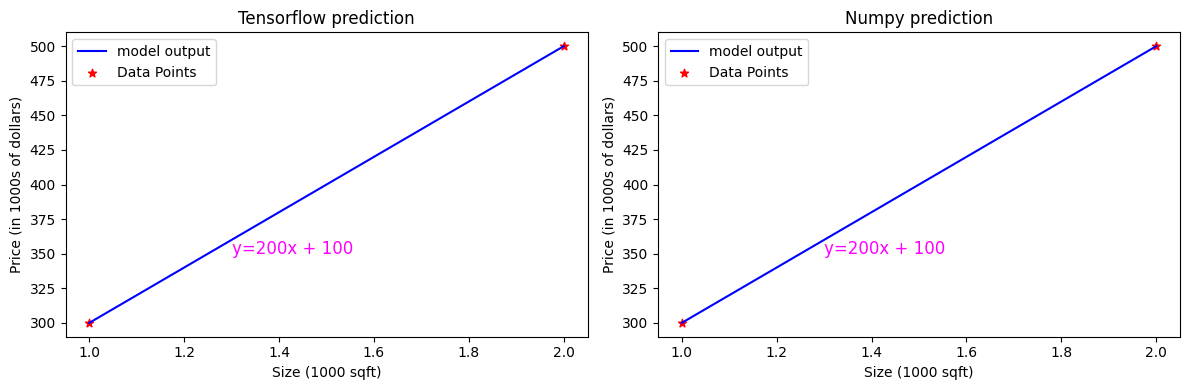

In [15]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)